#**DESAFIO KAGGLE - TRENDING YOUTUBE STATISTICS**

[Desafio Kaggle YouTube](https://www.kaggle.com/datasnaek/youtube-new)


#**Contexto**
O YouTube (o site de compartilhamento de vídeos mundialmente famoso) mantém uma lista dos principais vídeos de tendências na plataforma. De acordo com a revista Variety , “para determinar os vídeos mais populares do ano, o YouTube usa uma combinação de fatores, incluindo a medição das interações dos usuários (número de visualizações, compartilhamentos, comentários e curtidas). Observe que eles não são os vídeos mais vistos em geral no ano civil ”. Os principais artistas da lista de tendências do YouTube são vídeos de música (como o famoso "Gangam Style"), performances de celebridades e / ou reality shows e vídeos virais mostram que o YouTube é bem conhecido.

Resolvemos utilizar e estudar unicamente o dataset US, como uma forma de sintetizar nosso estudo.
Conseguimos observar nesse conjunto de dados as seguintes informações:

* Possui **40.949** entrada de dados, cada qual com **16** colunas com variáveis características, incluindo desde a identificação dos vídeos carregados até informações de contagem de likes, dislikes, comentários, horários de publicação, títulos e tags, assim como os canais que produzem os vídeos.
O conjunto de dados analisado se restringiu apenas ao documento do USA (USvideos.csv). Algumas perguntas surgiram inicialmente e nós iremos considerá-las para realizar a exploração dos dados.

```
Levantamento de perguntas:

1.   Quais fatores influenciam na popularidade dos vídeos em USA?
2.   Quais seriam as principais características para que um vídeo esteja entre os mais populares?
3.   Consigo verificar horários e dias da semana que seriam mais interessantes pra fazer um upload com uma maior possibilidade de visualizações?
4.   De que forma posso utilizar estes dados para melhorar a performance dos usuários da plataforma?
5.   De que forma posso apresentar estes dados para futuros investidores da plataforma?
```





#**ANÁLISE EXPLORATÓRIA DE DADOS**

#**Pré-processamento**

In [1]:
import pandas as pd
import pandas_profiling

path = './USvideos.csv'
df = pd.read_csv(path)
pfr = pandas_profiling.ProfileReport(df)
pfr.to_file("df_report.html")

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
#Importe as bibliotecas que serão utilizadas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json

import datetime
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

**Entendendo o dataset**

---

*   "video_id" - identificador do vídeo;
*   "trending_date - data de tendência, data em que foram cotados como populares;
*   "title" - título do vídeo;
*   "channel_title - canal do vídeo;
*   "category_id" - categoria do vídeo (no arquivo json, que será carregado abaixo, será criada a coluna "category_name" - correlacionando o ID à categoria;
*   "publish-tine" - hora da publicação;
*   "tags"- TAGS, principais palavras (são utilizados como buscador";
*   "views" - quantidade de visualizações;
*   "likes" - quantidade de curtidas;
*   "dislikes" - quantidade de não curtidas;
*   "comment_count" - quantidade de comentários;
*   "thumbnail_link" - imagem de capa do vídeo nas buscas;
*   "comments_disabled" - comentários desabilitados;
*   "ratings_disabled" - classificações desabilitadas;
*   "video_error_or_removed" - videos que sofreram erro ou foram removidos;
*   "description" - descrição do vídeo.   


In [3]:
#Lendo o dataframe e visualizando as colunas e linhas (parâmetro:2)
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."


In [4]:
#Visualizando colunas do dataframe
df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [5]:
#Visualizando as informações do dataframe, conseguimos aqui visualizar a contagem dos dados, o tipo, e verificar se existem dados faltantes em alguma das colunas, e que necessite de tratamento posteriormente.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [6]:
#Visualizando resumidamente os dados estatísticos do dataframe, utilizando apenas os dados numéricos
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


In [7]:
#Define a função contando os valores únicos no dataframe, o que facilitará o manuseio e a escolha das features
def count_unique(x):
  for col in x.columns:
    print(f'{col}: {x[col].nunique()}')
count_unique(df)

video_id: 6351
trending_date: 205
title: 6455
channel_title: 2207
category_id: 16
publish_time: 6269
tags: 6055
views: 40478
likes: 29850
dislikes: 8516
comment_count: 13773
thumbnail_link: 6352
comments_disabled: 2
ratings_disabled: 2
video_error_or_removed: 2
description: 6901


In [8]:
#Eliminando coluna "thumbnail_link", que não é relevante para o estudo do DF no momento
df.drop(columns='thumbnail_link', inplace=True)
print(df.columns)

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'description'],
      dtype='object')


In [9]:
# Lendo o json disponivel no Kaggle e correlacionando com a coluna "category_id", assim conseguimos visualizar os nomes dessas categorias
#Também definimos a coluna "category_name"

with open('US_category_id.json', 'r') as f:
  categ_us = json.load(f)

categ_dic = {}

for k in categ_us['items']:
  categ_dic[k['id']]= k['snippet']['title']

temp = df.category_id.copy()
temp = temp.astype('str')
df['category_name'] = temp.map(categ_dic)

print(df.loc[:10,['category_id', 'category_name']])

    category_id         category_name
0            22        People & Blogs
1            24         Entertainment
2            23                Comedy
3            24         Entertainment
4            24         Entertainment
5            28  Science & Technology
6            24         Entertainment
7            28  Science & Technology
8             1      Film & Animation
9            25       News & Politics
10           17                Sports


Total samples per year:
 2018    31349
2017     9600
Name: trending_date, dtype: int64


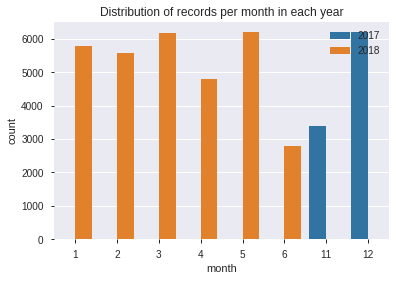

In [10]:
# Processando a feature: Tempo, utilizando datetime
df.trending_date = pd.to_datetime(df.trending_date, format='%y.%d.%m')

year_counts = df.trending_date.dt.year.value_counts()
print('Total samples per year:\n', year_counts) 

df['year'] = df.trending_date.dt.year
df['month'] = df.trending_date.dt.month

# Mostra as distribuições de registros/tempo (mês/ano)
sns.countplot(data=df, x = 'month', hue='year')
plt.title('Distribution of records per month in each year')
plt.legend(['2017', '2018'])
plt.show();

Pelo gráfico conseguimos extrair que o dataframe coletou dados de 2017 e 2018. 2018, os meses vão de Jan - Junho (1-6), onde Março e Maio tem o maior percentual de vídeos entre os mais populares, já em 2017, a análise foi feita apenas em Novembro e Dezembro, onde este último se equiparou aos registros mais altos de 2017.

#**Estudando popularidades, tendências, expressões mais comuns**

Text(0.5, 1.0, 'Most viewed videos')

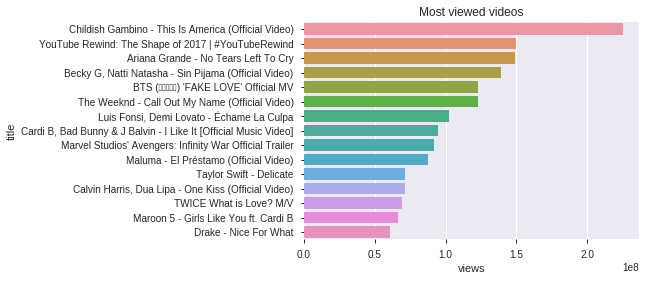

In [11]:
# Por visualizações
df2 = df.copy()

df2.sort_values('views', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)

sns.barplot(y='title', x='views', data=df2.iloc[:15])
plt.title('Most viewed videos')

In [12]:
df2.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,Music,2018,6
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment,2017,12
34708,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Music,2018,5
34888,zEf423kYfqk,2018-05-15,"Becky G, Natti Natasha - Sin Pijama (Official ...",BeckyGVEVO,10,2018-04-20T10:40:51.000Z,"Becky G|""Natti Natasha""|""Natti Natasha Music""|...",139334502,1425496,119798,83941,False,False,False,Becky G & Natti Natasha – “Sin Pijama”NUEVO SE...,Music,2018,5
38273,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music,2018,6


In [13]:
#Por Likes
df2.sort_values('likes', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)
df2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
38273,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music,2018,6
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,Music,2018,6
34708,ffxKSjUwKdU,2018-05-14,Ariana Grande - No Tears Left To Cry,ArianaGrandeVevo,10,2018-04-20T04:00:03.000Z,"Ariana|""Grande""|""No""|""Tears""|""Left""|""To""|""Cry""...",148689896,3094021,129502,242039,False,False,False,No Tears Left To Cry (Official Video)Song Avai...,Music,2018,5
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment,2017,12
3581,kTlv5_Bs8aw,2017-12-01,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",36857298,2729292,47896,546100,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,2017,12


In [14]:
#Por deslikes
df2.sort_values('dislikes', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)
df2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
11323,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,False,False,False,NaN,Entertainment,2018,1
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment,2017,12
15571,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism,2018,2
38547,VYOjWnS4cMY,2018-06-02,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,10,2018-05-06T04:00:07.000Z,"Childish Gambino|""Rap""|""This Is America""|""mcDJ...",225211923,5023450,343541,517232,False,False,False,“This is America” by Childish Gambino http://s...,Music,2018,6
17063,_5d-sQ7Fh5M,2018-02-09,LOGAN PAUL IS BACK!,Logan Paul Vlogs,24,2018-02-04T22:02:27.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",14161833,1216340,291900,436698,False,False,False,Do It Different. Be a Maverick ► https://ShopL...,Entertainment,2018,2


In [15]:
#Por comentários
df2.sort_values('comment_count', ascending=False, inplace=True)
df2.drop_duplicates('video_id', inplace=True)
df2.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
11323,QwZT7T-TXT0,2018-01-09,So Sorry.,Logan Paul Vlogs,24,2018-01-02T16:42:21.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",37539570,1402578,1674420,1361580,False,False,False,NaN,Entertainment,2018,1
38273,7C2z4GqqS5E,2018-06-01,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,2018-05-18T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""|""FAK...",123010920,5613827,206892,1228655,False,False,False,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...,Music,2018,6
6181,FlsCjmMhFmw,2017-12-14,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,False,False,False,"YouTube Rewind 2017. Celebrating the videos, p...",Entertainment,2017,12
15571,oWjxSkJpxFU,2018-02-01,Suicide: Be Here Tomorrow.,Logan Paul Vlogs,29,2018-01-24T18:30:01.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""l...",24286474,1988746,497847,658130,False,False,False,National Suicide Prevention Lifeline\nCall 1-8...,Nonprofits & Activism,2018,2
3581,kTlv5_Bs8aw,2017-12-01,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,2017-11-24T09:00:02.000Z,"BIGHIT|""빅히트""|""방탄소년단""|""BTS""|""BANGTAN""|""방탄""",36857298,2729292,47896,546100,False,False,False,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,Music,2017,12


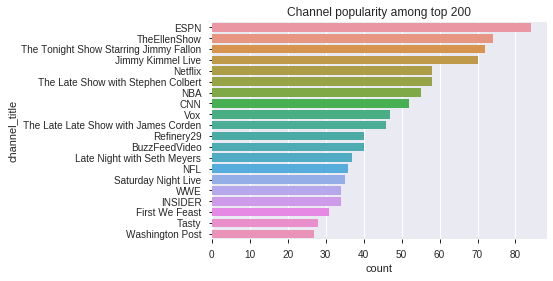

In [16]:
# Por canal
df2.drop_duplicates('video_id', inplace=True)
sns.countplot(y='channel_title', data=df2, order=df2.channel_title.value_counts().iloc[:20].index)
plt.title('Channel popularity among top 200');

Conseguimos visualizar 

In [0]:
#Dividindo por ano - A classificação de popularidade dos vídeos varia muito entre os meses
df_2017 = df[df.trending_date.dt.year == 2017]
df_2018 = df[df.trending_date.dt.year == 2018]

In [0]:
# 2017 (11-12 months)
var = 'likes'
mon = 12

In [19]:
#Apresenta os 5 primeiros vídeos agrupando pelo vídeo, título e quantidade de likes - os mais curtidos em Dez 2017:
df_2017.loc[df.trending_date.dt.month == mon, ['video_id', 'title', var]].groupby(
    ['video_id', 'title']).sum().sort_values(var, ascending = False).head(5)

,,likes
video_id,title,
6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Official Trailer,19819535
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRewind,19781372
SM1w9PEQOE8,Demi Lovato - Tell Me You Love Me,8379638
WS7f5xpGYn8,Katy Perry - Hey Hey Hey (Official),6776063
khPLWaBioOs,Logan Paul - SANTA DISS TRACK (Official Music Video),6354734


In [0]:
# 2018 (1-6 months)
var = 'likes'
mon = 1

In [21]:
#Apresenta os 5 primeiros vídeos agrupando pelo vídeo, título e quantidade de likes - os mais curtidos em Jan 2018:
df_2018.loc[df.trending_date.dt.month == mon, ['video_id', 'title', var]].groupby(
    ['video_id', 'title']).sum().sort_values(var, ascending = False).head(5)

,,likes
video_id,title,
oWjxSkJpxFU,Suicide: Be Here Tomorrow.,12282280
dfnCAmr569k,"Taylor Swift - End Game ft. Ed Sheeran, Future",11127424
LsoLEjrDogU,Bruno Mars - Finesse (Remix) [Feat. Cardi B] [Official Video],9188754
QwZT7T-TXT0,So Sorry.,8495733
Mgfe5tIwOj0,Dua Lipa - IDGAF (Official Music Video),6866042


In [22]:
#Valor visualizar a coluna category_name (vinculada category_id com json) e contar os valores existentes, assim descobriremos as categorias mais populares neste df
df['category_name'].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_name, dtype: int64

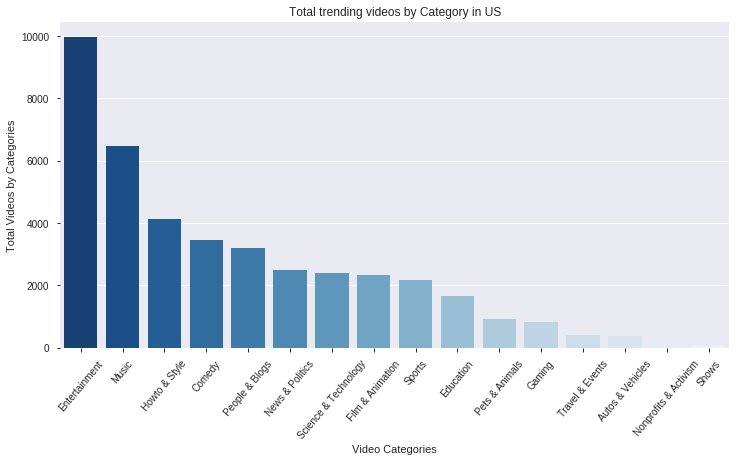

In [23]:
#Visualizando popularidade por categoria
plt.figure(figsize=(12,6))
sns.countplot(x='category_name', data=df, palette='Blues_r', order=df['category_name'].value_counts().index)
plt.xticks(rotation=50)
plt.xlabel('Video Categories')
plt.ylabel('Total Videos by Categories')
plt.title('Total trending videos by Category in US')
plt.show()

Percebe-se aqui que os vídeos de "Entertainment"(9.964) são os mais populares, seguido por "Music"(6.472), que tbm é uma tendência e um tipo de entretenimento. Há aqui uma categoria que se chama "Howto & Style", sendo canais de ensino a estilização e possivelmente DIY, ou faça você mesmo, uma categoria um tanto quanto surpreendente. A última categoria listada e com menos quantidade de diversidade, seria "Shows", talvez pela redundância com a categoria "Music", ou pela concorrência com a divulgação em televisão, ou pelo o fator humano, onde as pessoas acham mais interessante essa categoria sendo visualizada ao vivo (hipóteses)

In [0]:
df3 = df.copy()
#Vamos verificar agora quais serão os melhores horários para publicar e os melhores dias;

In [25]:
#Ao ler a coluna 'publish_time' identificamos que a mesma encontra-se conjunta, dados de dias e horário, o que inviabiliza a visualização
df3['publish_time']

0        2017-11-13T17:13:01.000Z
1        2017-11-13T07:30:00.000Z
2        2017-11-12T19:05:24.000Z
3        2017-11-13T11:00:04.000Z
4        2017-11-12T18:01:41.000Z
                   ...           
40944    2018-05-18T13:00:04.000Z
40945    2018-05-18T01:00:06.000Z
40946    2018-05-18T17:34:22.000Z
40947    2018-05-17T17:00:04.000Z
40948    2018-05-17T17:09:38.000Z
Name: publish_time, Length: 40949, dtype: object

In [0]:
#Definimos então duas novas categorias ['pub_day', 'pub_hour'], e passamos a função datetime separando os dados, em seguinda elimina-se a coluna publish_time do df porque não será mais utilizada:
df3['pub_day'] = df3['publish_time'].apply(lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d"). date().strftime('%a'))
df3['pub_hour'] = df3['publish_time'].apply(lambda x: x[11:13])
df3.drop(labels='publish_time', axis=1, inplace=True)

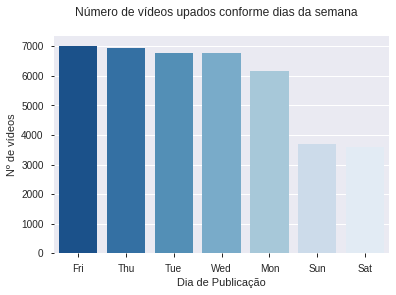

In [27]:
#Geramos um novo df, onde se passa a variável pub_day, apresentando os valores conforme index, renomeando as colunas e apresentando o plot.
new_df = df3["pub_day"].value_counts()\
.to_frame().reset_index().rename(columns={"index": "pub_day", "pub_day" : "Numero_videos"})
fig, ax = plt.subplots()
fig.suptitle("Número de vídeos upados conforme dias da semana")
_ = sns.barplot(x="pub_day", y="Numero_videos", data=new_df, 
                palette='Blues_r', ax=ax)
_ = ax.set(xlabel="Dia de Publicação", ylabel="Nº de vídeos")
plt.show();


Conseguimos perceber aqui que nas **sextas-feiras** existe um grande índice de videos publicados, enquanto, **sábados e domingos** tem um menor índice de upload, refletindo diretamente na tendência e popularidade.

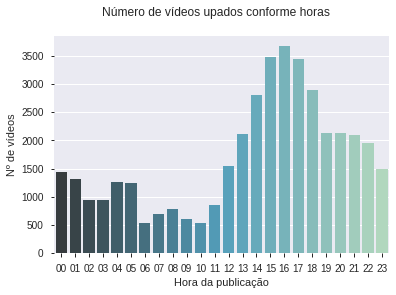

In [28]:
#Fazendo o mesmo procedimento para as horas temos:
new_df = df3["pub_hour"].value_counts()\
.to_frame().reset_index().rename(columns={"index": "pub_hour", "pub_hour" : "Numero_videos"})
fig, ax = plt.subplots()
fig.suptitle("Número de vídeos upados conforme horas")
_ = sns.barplot(x="pub_hour", y="Numero_videos", data=new_df, 
                palette='GnBu_d', ax=ax)
_ = ax.set(xlabel="Hora da publicação", ylabel="Nº de vídeos")
plt.show();

Conseguimos perceber aqui que entre **14:00AM - 19:00PM** existe um índice muito alto de vídeos com mais popularidade sendo publicados. A partir das 19:00PM ele sofre uma queda e se mantém constante até às 01:00 quando diminui novamente e fica estável. Podemos perceber que **entre 15 e 18:00 são os melhores horários para upload**.

In [29]:
#Vamos verificar as 30 palavras mais utilizados/comuns nos títulos, usando WordCloud vamos fazer uma nuvem de palavras
texts = list(df['title'].apply(lambda x: x.split()))
texts = [x for y in texts for x in y]
Counter(texts).most_common(30)

[('-', 11452),
 ('|', 10663),
 ('The', 5762),
 ('the', 3610),
 ('a', 2566),
 ('to', 2343),
 ('of', 2338),
 ('in', 2176),
 ('A', 2122),
 ('&', 2024),
 ('I', 1940),
 ('and', 1917),
 ('Video)', 1901),
 ('Trailer', 1868),
 ('How', 1661),
 ('with', 1655),
 ('2018', 1613),
 ('(Official', 1594),
 ('Official', 1554),
 ('on', 1552),
 ('To', 1397),
 ('You', 1254),
 ('My', 1080),
 ('for', 1020),
 ('ft.', 1017),
 ('In', 943),
 ('With', 897),
 ('Is', 828),
 ('at', 826),
 ('What', 773)]

Se retirarmos expressões comuns como "at", "the", "do", podemos perceber várias expressões comuns como "New", "Trailer", "VS", "Music", "Video", "Official", "Day" entre outras expressões mais utilizadas e que estão entre as mais populares.

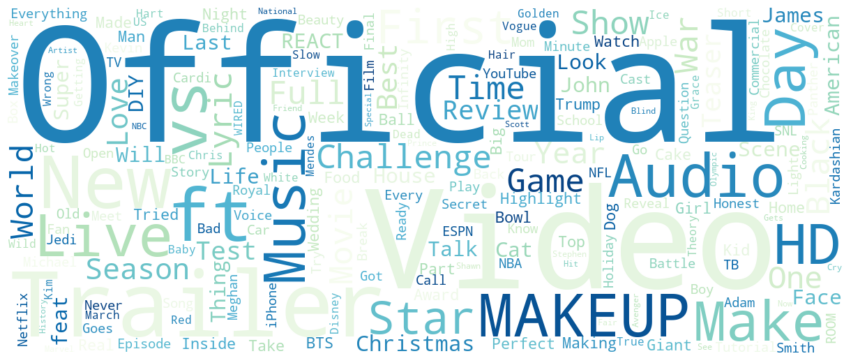

In [30]:
word_cloud = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="GnBu_r").generate(" ".join(texts))
plt.figure(figsize=(15,10))
plt.imshow(word_cloud, interpolation='bilinear')
_ = plt.axis("off")

Se retirarmos expessões comuns como "at", "the", "do", podemos perceber várias expressões comuns como **"New", "Trailer", "VS", "Music", "Video", "Official", "Day"** entre outras expressões mais utilizadas e que estão entre as mais populares.

#**Outliers, Modelando, Feature Importance - ML**

In [0]:
df_US = df.copy()

In [0]:
#Vamos tratar os outliers com uma função no novo dataframe:
def detect_outliers(df_US,n,features):
    outlier_indices = []
    
    for col in features:

        Q1 = np.percentile(df_US[col], 25)
        Q3 = np.percentile(df_US[col],75)
        IQR = Q3 - Q1

        outlier_step = 1.5 * IQR
        outlier_list_col = df_US[(df_US[col] < Q1 - outlier_step) | (df_US[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)

    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [33]:
Outliers_to_drop = detect_outliers(df_US,1,['views', 'likes', 'dislikes', 'comment_count'])
df_US.loc[Outliers_to_drop]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name,year,month
32,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158531,787419,43420,125882,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music,2017,11
53,9t9u_yPEidY,2017-11-14,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190083,15015,11473,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...",Music,2017,11
69,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,False,False,False,Click here to continue the story and make your...,Howto & Style,2017,11
70,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music,2017,11
104,pz95u3UVpaM,2017-11-14,Camila Cabello - Havana (Vertical Video) ft. Y...,CamilaCabelloVEVO,10,2017-11-10T05:01:00.000Z,"camila cabello|""camila""|""young thug""|""havana""|...",5476737,286268,4083,12254,False,False,False,Havana – Spotify Vertical Video \nVideo Direct...,Music,2017,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40704,au8QGTiPhEw,2018-06-13,Azealia Banks - Anna Wintour,AzealiaBanksVEVO,10,2018-05-24T15:59:22.000Z,"Azealia|""Banks""|""Anna""|""Wintour""|""eOne""|""Music...",2561953,89970,12293,15691,False,False,False,Azealia Banks Anna WintoureOne MusicAvailable ...,Music,2018,6
40809,GnGPAYvve1A,2018-06-14,#ProudToCreate: Pride 2018,YouTube Spotlight,24,2018-06-07T19:08:51.000Z,"#Pride|""#ProudToCreate""|""#ProudToBe""|""#ProudTo...",1329391,48386,126931,90365,False,False,False,You don't just imagine a better future – you c...,Entertainment,2018,6
40898,hQW_9ws8OhA,2018-06-14,10 of the Most GIANT Products that Actually Work!,Matthias,23,2018-05-25T16:50:01.000Z,"huge|""giant""|""toy""|""in real life""|""oversized p...",3920987,75808,6072,23616,False,False,False,Today I unbox some 'normal' products that were...,Comedy,2018,6
40902,jxWJLs7_doc,2018-06-14,SUNNY - WAVE ft. Lil Jamez (Official Music Video),Jake Paul,22,2018-05-26T00:16:30.000Z,"Jake|""Paul""|""logan""|""paul""|""its""|""every""|""day""...",3464680,91836,66910,29673,False,False,False,I wanted you guys to hear this awesome new son...,People & Blogs,2018,6


In [0]:
#Deletando os Outliers encontrados
df_US = df_US.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

In [35]:
#Percentual dos valores nulos
percent_missing = round(df_US.isnull().sum() * 100 / len(df_US),2)
missing_value_df = pd.DataFrame({'column_name': df_US.columns, 'percent_missing': percent_missing})
missing_value_df = missing_value_df[missing_value_df['percent_missing'] > 0]
missing_value_df.sort_values('percent_missing', inplace=True, ascending=False)
missing_value_df

,column_name,percent_missing
description,description,1.44


Text(0, 0.5, 'category_id')

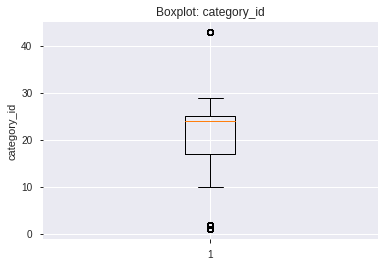

In [36]:
#Substituindo os valores na da coluna "description" e "category_name" por'Missing' 
df_US.description.fillna('Missing', inplace=True)
df_US.category_name.fillna('Missing', inplace=True)


# Detectando Valores nulos
df_US.isnull().sum()/ len(df_US) * 100

# Bloxpot feature 'category_id'
plt.boxplot(df_US['category_id'])
plt.title('Boxplot: category_id')
plt.ylabel('category_id')

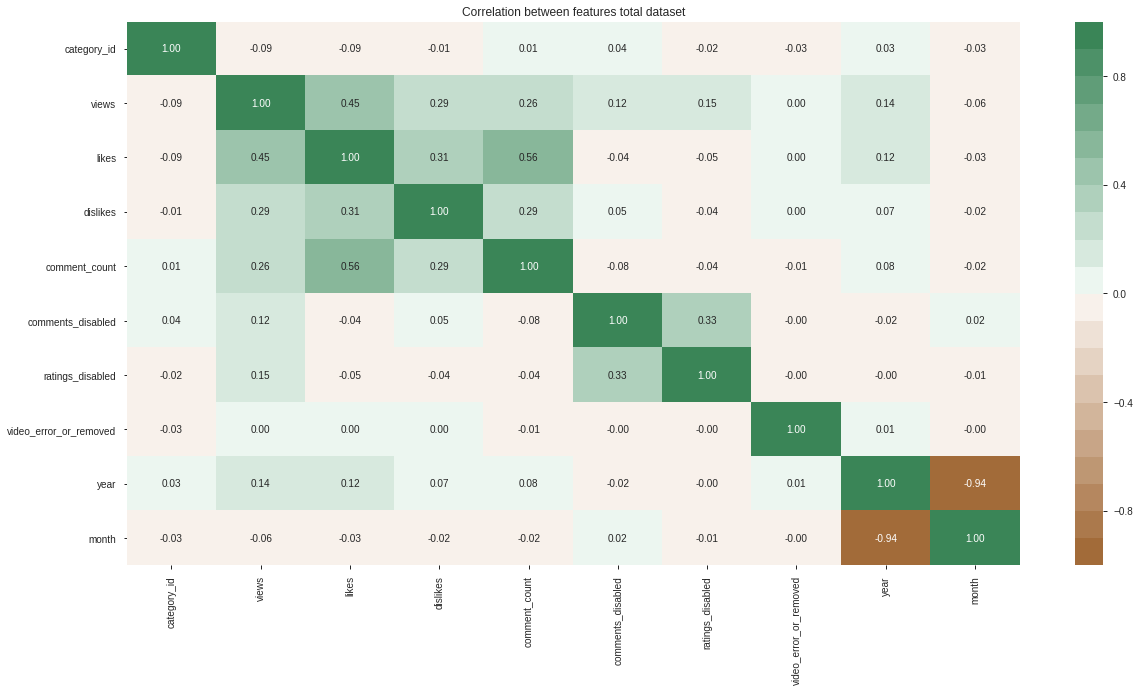

In [37]:
#Análise e Visualização - Correlação de todas as variáveis com Heatmap
plt.figure(figsize=[20,10])
plt.title('Correlation between features total dataset')
sns.heatmap(df_US.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap=sns.diverging_palette(400, 500, n=20))
plt.show()

#**CONCLUSÕES**

Quando apresentamos os vídeos mais visualizados no df como um geral, aparecem vídeos nas categorias Entretenimento e Músicas, que comprovadamente mais a frente são as categorias mais populares na plataforma.

Um dos canais mais assistidos de acordo com os gráficos do df, seria o da ESPN (programa voltado para esportes) e The Ellen Show (Entretenimento), conseguimos visualizá-los como potênciais de espectadores, nos levando a entender que anunciar em um canal voltado para alguma dessas categorias ou em algum destes canais específicos, terá um maior acesso por parte dos usuários da plataforma.

Conseguimos visualizar nitidamente no gráfico de barras que Entretenimento, Música e a categoria inusitada  “Howto & Style” estão entre as principais categorias acessadas, aqui conseguimos aferir que no contexto de negócios, considerando as views, likes e até mesmo dislikes (toda publicidade é “boa”), são ótimos chamarizes para anúncios, principalmente com serviços, produtos e negócios que atendam a esse público (um estudo mais aprofundado contendo média de idade, sexo, entre outros, poderia auxiliar no direcionamento de propaganda).

Observa-se também que a maior parte dos vídeos que sobem para a plataforma são publicados em sua grande parte, seguindo a ordem: nas sextas, quintas, terças, quartas e segundas, tendo uma queda desse proporção aos finais de semana. Bem como conseguimos perceber também que entre 15 e 18:00h seria o pico desses uploads, sugerindo assim esses dados que seriam ótimas informações a se passar para novos users, ou empresas que utilizam a plataforma e que querem uma maior consistência e retorno nos seus vídeos.

É possível verificar com o WordCloud, as principais palavras, tags, textos que de alguma forma estão correlacionados não só ao conteúdo mas como um chamariz para a visualização dos vídeos, uma vez que na nuvem de palavras conseguimos verificar várias destas ligadas as principais categorias listadas entre as populares, sugerindo que, se seu vídeo contém algum conteúdo que correlacione a algum destes assuntos (músicas, vídeos, trailers, assuntos oficiais, react, maquiagem, tutoriais, audio) a probabilidade de estar entre vídeos com visualizações interessantes é maior.


